# 2. Supervised Learning

A machine learning task where the desired output for new inputs is learnt from known input-output pairs.
* Regression: estimating the mapping from (continuous) input to output 
* Classification: identifying which category a sample belongs to, based on previous samples (training set) whose category is known

### Example: Classifying Sound Data with Support Vector Machine
#### Support Vector Machine
* Binary classifier that is based on finding the optimal hyperplane between the two classes that separates the classes with maximum margin
* New samples that fall on the same side of the hyperplane as the training samples in class $y_i$ are classified to that class

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
plt.style.use('seaborn-darkgrid')

In [3]:
from sklearn.svm import SVC

features = ['zero_crossing_rate', 'spectral_centroid']
df = pd.read_csv('../data/cats_and_dogs.csv', index_col=0)

normalizer = MinMaxScaler()
model = SVC(kernel='linear', C=1e99)

df[features] = normalizer.fit_transform(df[features].values)
model.fit(df[features], df.animal);

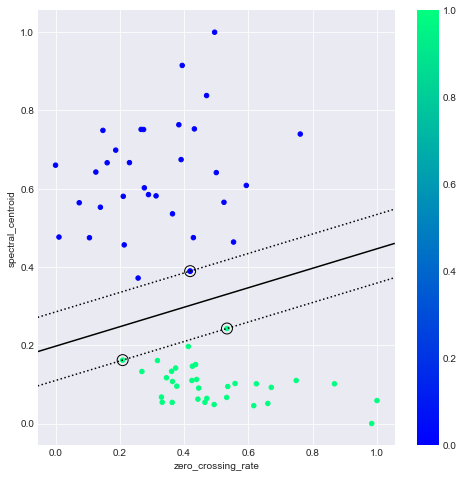

In [4]:
def plot_decision_boundary(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1],
               linestyles=[':', '-', ':'])
    
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=120, marker='o', linewidth=1, facecolors='none', edgecolor='k');

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

fig, ax = plt.subplots(figsize=(8, 8))
df.plot.scatter(*features, c=df.animal == 'dog', cmap='winter', ax=ax)
plot_decision_boundary(model, ax)

In [5]:
test_data = pd.read_csv('../data/test_cats_and_dogs.csv', index_col=0)
test_data

,filename,animal,spectral_centroid,zero_crossing_rate
name,,,,
cat,../data/test/cat.wav,cat,2273.977803,0.154522
dog,../data/test/dog.wav,dog,1156.978209,0.079116


In [6]:
import IPython.display as ipd
ipd.Audio(test_data.filename.iloc[0])

In [7]:
ipd.Audio(test_data.filename.iloc[1])

In [8]:
test_data[features] = normalizer.transform(test_data[features].values)
test_data['predicted_animal'] = model.predict(test_data[features])
test_data

,filename,animal,spectral_centroid,zero_crossing_rate,predicted_animal
name,,,,,
cat,../data/test/cat.wav,cat,0.441655,0.769331,cat
dog,../data/test/dog.wav,dog,0.091455,0.235005,dog
